In [1]:
import numpy as np
from PIL import Image

path = "/content/drive/MyDrive/Colab Notebooks/SIA/maskings/BLD00578_PS3_K3A_NIA0277.png"
img = Image.open(path)
img.show()

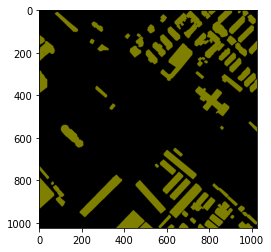

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open(path)
plt.imshow(image)
plt.show()

In [21]:
#변환할 이미지 목록 불러오기
import os
img_path = "/content/drive/MyDrive/Colab Notebooks/SIA_Share/labels/"
img_org_path = "/content/drive/MyDrive/Colab Notebooks/SIA_Share/images/"
img_list = os.listdir(img_path) #디렉토리 내 모든 파일 불러오기
img_list_png = [img for img in img_list if img.endswith(".png")] #지정된 확장자만 필터링

for i in range(10):
  img_list_png[i]
  print(img_list_png[i])

BLD03038_PS3_K3A_NIA0375.png
BLD03042_PS3_K3A_NIA0375.png
BLD03057_PS3_K3A_NIA0376.png
BLD03081_PS3_K3A_NIA0376.png
BLD03091_PS3_K3A_NIA0376.png
BLD03092_PS3_K3A_NIA0376.png
BLD03093_PS3_K3A_NIA0376.png
BLD03098_PS3_K3A_NIA0376.png
BLD03096_PS3_K3A_NIA0376.png
BLD03094_PS3_K3A_NIA0376.png


In [42]:
rate_up025 = []
rate_down025 = []
for z in range(len(img_list_png)):
  img = Image.open(img_path + img_list_png[z])
  img.show()
  img_org = Image.open(img_org_path + img_list_png[z])
  img_org.show()
  x = np.array(img)
  x = np.array(img)
  xzero = 0
  xnzero = 0
  x1 = np.zeros((1024,1024), int)
  for i in range(1024):
      for j in range(1024):
        x1[i][j] = x[i][j].max()
        if x[i][j].max() == 0:
          xzero +=1                        
        else:
          xnzero +=1
  rate = xnzero/(xzero+xnzero)
  print(img_list_png[z])
  plt.subplot(1,2,1)
  plt.imshow(img_org)
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()
  print(rate)
  if rate >= 0.025:
    rate_up025.append(img_list_png[z])
  else :
    rate_down025.append(img_list_png[z])
  print("-"*50)

Output hidden; open in https://colab.research.google.com to view.

In [49]:
len(rate_up025)

1840

In [48]:
len(rate_down025)

318

In [45]:
import sys

with open('/content/drive/MyDrive/Colab Notebooks/SIA_Share/up_0.025.txt','w',encoding='UTF-8') as f:
    for i in range(len(rate_up025)):
      f.write(rate_up025[i] + "\n")
    f.close()

In [46]:
import sys

with open('/content/drive/MyDrive/Colab Notebooks/SIA_Share/down_0.025.txt','w',encoding='UTF-8') as f:
    for i in range(len(rate_down025)):
      f.write(rate_down025[i] + "\n")
    f.close()